In [6]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost
import plotnine as pn
%matplotlib inline
#import plydata.cat_tools as cat
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cluster import DBSCAN, MeanShift, KMeans

In [4]:
with zipfile.ZipFile('/content/online+retail+ii.zip', 'r') as zipref:
  zipref.extractall('/content/')

In [5]:
df = pd.read_excel('/content/online_retail_II.xlsx')

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [11]:
sorted_df = df.sort_values(['Customer ID', 'InvoiceDate'])
sorted_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.0,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,NaN,United Kingdom


In [ ]:
sorted_df.head(14)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.0,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.0,United Kingdom
71080,C495800,ADJUST,Adjustment by john on 26/01/2010 17,-1,2010-01-26 17:27:00,103.50,12346.0,United Kingdom


In [12]:
sorted_df.isnull().mean()*100

,0
Invoice,0.000000
StockCode,0.000000
Description,0.557225
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,20.539488
Country,0.000000


In [13]:
sorted_df['Customer ID'].fillna('Anonymous', inplace=True)

<ipython-input-13-7e7a4c515b98>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Anonymous' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


Handling Missing Customer IDs
In the dataset, some entries in the 'Customer ID' column are missing, indicating that these transactions might have been made by customers who did not create an account. To address this, we have replaced all NaN (null) values in the 'Customer ID' column with the string 'Anonymous'.

This approach allows us to maintain the integrity of the dataset by ensuring that every transaction is associated with a value, even if it is not a specific customer ID

In [14]:
sorted_df[sorted_df['Customer ID'] == 'Anonymous']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,Anonymous,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,Anonymous,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,Anonymous,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,Anonymous,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,Anonymous,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,Anonymous,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,Anonymous,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,Anonymous,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,Anonymous,United Kingdom


In [15]:
null_description_row = sorted_df[sorted_df['Description'].isna()]
null_description_row

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,Anonymous,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,Anonymous,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,Anonymous,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,Anonymous,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,Anonymous,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,Anonymous,United Kingdom
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,Anonymous,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,Anonymous,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,Anonymous,United Kingdom


In [16]:
invoice_description_dict  = sorted_df.groupby('StockCode')['Description'].first().to_dict() #Create Dictionary for First Descriptions per Invoice

In [17]:
sorted_df['Description'] = sorted_df['Description']\
    .fillna(sorted_df['StockCode'].map(invoice_description_dict))\
    .fillna('Unknown') # Replace Null Descriptions with Corresponding Descriptions and fill remaining with null values

In [18]:
sorted_df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [19]:
sorted_df[sorted_df['Description'] == 'Unknown'].count()

,0
Invoice,365
StockCode,365
Description,365
Quantity,365
InvoiceDate,365
Price,365
Customer ID,365
Country,365


effectively handles null values in the 'description' column by first attempting to replace them with the most relevant descriptions based on invoice data, and then using 'Unknown' for any remaining nulls. This approach ensures that the dataset remains comprehensive and ready for further analysis.

In [20]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525461 entries, 27994 to 525235
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  525461 non-null  object        
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.1+ MB


In [21]:
sorted_df.nunique()

,0
Invoice,28816
StockCode,4632
Description,4682
Quantity,825
InvoiceDate,25296
Price,1606
Customer ID,4384
Country,40


In [22]:
sorted_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845018112,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914


In [24]:
sorted_df.loc[(sorted_df.Price < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,Anonymous,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,Anonymous,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,Anonymous,United Kingdom


In [25]:
sorted_df[sorted_df['StockCode'] == 'B']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,Anonymous,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,Anonymous,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,Anonymous,United Kingdom


StockCode with B is bad debt. We going to ignore them.

In [26]:
sorted_df.loc[(sorted_df.Quantity < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71080,C495800,ADJUST,Adjustment by john on 26/01/2010 17,-1,2010-01-26 17:27:00,103.50,12346.0,United Kingdom
255586,C514024,M,Manual,-1,2010-06-30 11:22:00,5.18,12346.0,United Kingdom
255587,C514024,M,Manual,-1,2010-06-30 11:22:00,12.94,12346.0,United Kingdom
255588,C514024,M,Manual,-1,2010-06-30 11:22:00,4.66,12346.0,United Kingdom
255589,C514024,M,Manual,-1,2010-06-30 11:22:00,12.94,12346.0,United Kingdom
...,...,...,...,...,...,...,...,...
524458,538092,37467,PIG MUG IN TWO COLOUR DESIGNS,-177,2010-12-09 14:49:00,0.00,Anonymous,United Kingdom
525231,538159,21324,HANGING MEDINA LANTERN SMALL,-18,2010-12-09 17:17:00,0.00,Anonymous,United Kingdom
525232,538158,20892,SET/3 TALL GLASS CANDLE HOLDER PINK,-32,2010-12-09 17:17:00,0.00,Anonymous,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,Anonymous,United Kingdom


Canceled item's Stock code starts with C which is negative.
Price is 0.
DESCRIPTION is manual.


In [27]:
sorted_df.shape

(525461, 8)

Remove all negative values

In [28]:
sorted_df = sorted_df[sorted_df.Quantity > 0]
sorted_df = sorted_df[sorted_df.Price > 0]

In [29]:
sorted_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom


In [30]:
sorted_df = sorted_df[sorted_df.Description != 'This is a test product.']

In [31]:
sorted_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
107800,499763,20682,RED SPOTTY CHILDS UMBRELLA,1,2010-03-02 13:08:00,3.25,12346.0,United Kingdom
107801,499763,20679,EDWARDIAN PARASOL RED,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom
107802,499763,15056N,EDWARDIAN PARASOL NATURAL,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom
107803,499763,15056BL,EDWARDIAN PARASOL BLACK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom
107804,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom


In [ ]:
sorted_df['Revenue'] = sorted_df['Quantity'] * sorted_df['Price']

<ipython-input-51-83c188415132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511556 entries, 107800 to 525147
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      511556 non-null  object        
 1   StockCode    511556 non-null  object        
 2   Description  511556 non-null  object        
 3   Quantity     511556 non-null  int64         
 4   InvoiceDate  511556 non-null  datetime64[ns]
 5   Price        511556 non-null  float64       
 6   Customer ID  511556 non-null  object        
 7   Country      511556 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 35.1+ MB


#Cohort Analysis

In [33]:
cohort_df = sorted_df[sorted_df['Customer ID'] != 'Anonymous'] #cohort analysis

In [34]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407654 entries, 107800 to 478769
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407654 non-null  object        
 1   StockCode    407654 non-null  object        
 2   Description  407654 non-null  object        
 3   Quantity     407654 non-null  int64         
 4   InvoiceDate  407654 non-null  datetime64[ns]
 5   Price        407654 non-null  float64       
 6   Customer ID  407654 non-null  object        
 7   Country      407654 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 28.0+ MB


#Cleaning Date

In [36]:
cohort_df['Date']= cohort_df['InvoiceDate'].dt.strftime('%Y-%m')
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407654 entries, 107800 to 478769
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407654 non-null  object        
 1   StockCode    407654 non-null  object        
 2   Description  407654 non-null  object        
 3   Quantity     407654 non-null  int64         
 4   InvoiceDate  407654 non-null  datetime64[ns]
 5   Price        407654 non-null  float64       
 6   Customer ID  407654 non-null  object        
 7   Country      407654 non-null  object        
 8   Date         407654 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 31.1+ MB


<ipython-input-36-5f709a3e2b19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
cohort_df['Date'] = pd.to_datetime(cohort_df['Date'])
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407654 entries, 107800 to 478769
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407654 non-null  object        
 1   StockCode    407654 non-null  object        
 2   Description  407654 non-null  object        
 3   Quantity     407654 non-null  int64         
 4   InvoiceDate  407654 non-null  datetime64[ns]
 5   Price        407654 non-null  float64       
 6   Customer ID  407654 non-null  object        
 7   Country      407654 non-null  object        
 8   Date         407654 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 31.1+ MB


<ipython-input-38-2db6a005d199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
cohort_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
478765,534346,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-11-22 11:51:00,2.10,18287.0,United Kingdom,2010-11-01
478766,534346,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01
478767,534346,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01
478768,534346,85040A,S/4 PINK FLOWER CANDLES IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01
478769,534346,C2,CARRIAGE,1,2010-11-22 11:51:00,50.00,18287.0,United Kingdom,2010-11-01


In [40]:
#create a column index with minimum invoice date for first time customer
cohort_df['Cohort Month'] = cohort_df.groupby('Customer ID')['Date'].transform('min')
cohort_df.head(15)

<ipython-input-40-3170d2294df1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cohort Month
107800,499763,20682,RED SPOTTY CHILDS UMBRELLA,1,2010-03-02 13:08:00,3.25,12346.0,United Kingdom,2010-03-01,2010-03-01
107801,499763,20679,EDWARDIAN PARASOL RED,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01
107802,499763,15056N,EDWARDIAN PARASOL NATURAL,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01
107803,499763,15056BL,EDWARDIAN PARASOL BLACK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01
107804,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01
253028,513774,21524,DOORMAT SPOTTY HOME SWEET HOME,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-01,2010-03-01
253029,513774,22692,DOORMAT WELCOME TO OUR HOME,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-01,2010-03-01
253030,513774,22660,DOORMAT I LOVE LONDON,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-01,2010-03-01
253031,513774,22687,DOORMAT CHRISTMAS VILLAGE,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-01,2010-03-01
253032,513774,48173C,DOORMAT BLACK FLOCK,1,2010-06-28 13:53:00,7.49,12346.0,United Kingdom,2010-06-01,2010-03-01


In [41]:
cohort_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cohort Month
478765,534346,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-11-22 11:51:00,2.10,18287.0,United Kingdom,2010-11-01,2010-05-01
478766,534346,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01
478767,534346,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01
478768,534346,85040A,S/4 PINK FLOWER CANDLES IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01
478769,534346,C2,CARRIAGE,1,2010-11-22 11:51:00,50.00,18287.0,United Kingdom,2010-11-01,2010-05-01


In [50]:
import datetime
def get_date(df, column):
  day = df[column].dt.day
  month = df[column].dt.month
  year = df[column].dt.year
  return day, month, year

In [51]:
_,Invoice_Month,Invoice_Year = get_date(cohort_df, 'Date')
_,Cohort_Month,Cohort_Year = get_date(cohort_df, 'Cohort Month')

In [52]:
Year_diff = Invoice_Year - Cohort_Year
Month_diff = Invoice_Month - Cohort_Month
cohort_df['CohortIndex'] = Year_diff*12 + Month_diff + 1
cohort_df.head()

<ipython-input-52-f651a7732f56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cohort Month,CohortIndex
107800,499763,20682,RED SPOTTY CHILDS UMBRELLA,1,2010-03-02 13:08:00,3.25,12346.0,United Kingdom,2010-03-01,2010-03-01,1
107801,499763,20679,EDWARDIAN PARASOL RED,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01,1
107802,499763,15056N,EDWARDIAN PARASOL NATURAL,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01,1
107803,499763,15056BL,EDWARDIAN PARASOL BLACK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01,1
107804,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346.0,United Kingdom,2010-03-01,2010-03-01,1


In [53]:
cohort_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cohort Month,CohortIndex
478765,534346,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-11-22 11:51:00,2.10,18287.0,United Kingdom,2010-11-01,2010-05-01,7
478766,534346,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01,7
478767,534346,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01,7
478768,534346,85040A,S/4 PINK FLOWER CANDLES IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01,7
478769,534346,C2,CARRIAGE,1,2010-11-22 11:51:00,50.00,18287.0,United Kingdom,2010-11-01,2010-05-01,7


In [56]:
cohort_summary = cohort_df.groupby(['Cohort Month', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_summary

,Cohort Month,CohortIndex,Customer ID
0,2009-12-01,1,954
1,2009-12-01,2,336
2,2009-12-01,3,319
3,2009-12-01,4,405
4,2009-12-01,5,363
...,...,...,...
86,2010-10-01,2,97
87,2010-10-01,3,35
88,2010-11-01,1,325
89,2010-11-01,2,35


In [59]:
pivot_cohort = cohort_summary.pivot(index = 'Cohort Month', columns = ['CohortIndex'], values ='Customer ID')
pivot_cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2009-12-01,954.0,336.0,319.0,405.0,363.0,343.0,359.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,444.0,84.0,102.0,108.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
pivot_cohort.index = pivot_cohort.index.to_period('M').strftime('%Y-%m')

AttributeError: 'Index' object has no attribute 'to_period'

In [73]:
percent_cohort = pivot_cohort.divide(pivot_cohort.iloc[:, 0], axis = 0)

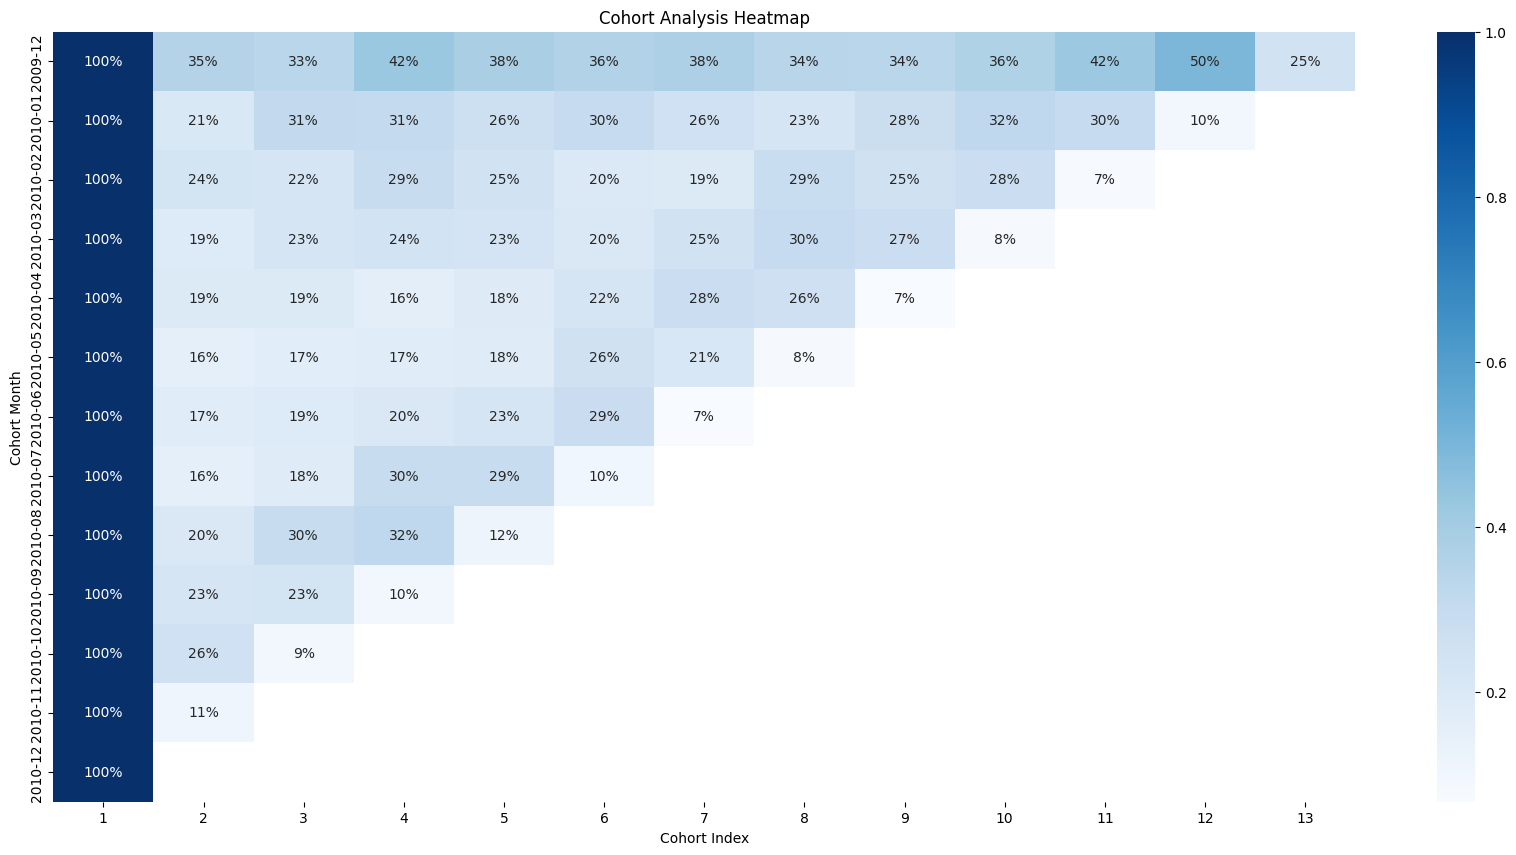

In [81]:
plt.figure(figsize= (21, 10))
sns.heatmap(percent_cohort, annot= True, cmap= 'Blues', fmt='.0%')
plt.yticks(rotation=90)
plt.title('Cohort Analysis Heatmap')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')

plt.show()

#Net Revenue Retention

In [85]:
cohort_df['Revenue'] = cohort_df['Quantity'] * cohort_df['Price']
cohort_df.tail()

<ipython-input-85-19fab0aef4ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Cohort Month,CohortIndex,Revenue
478765,534346,22866,HAND WARMER SCOTTY DOG DESIGN,12,2010-11-22 11:51:00,2.10,18287.0,United Kingdom,2010-11-01,2010-05-01,7,25.2
478766,534346,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01,7,69.6
478767,534346,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01,7,69.6
478768,534346,85040A,S/4 PINK FLOWER CANDLES IN BOWL,48,2010-11-22 11:51:00,1.45,18287.0,United Kingdom,2010-11-01,2010-05-01,7,69.6
478769,534346,C2,CARRIAGE,1,2010-11-22 11:51:00,50.00,18287.0,United Kingdom,2010-11-01,2010-05-01,7,50.0


In [1]:
plt.figure(figsize = (21, 10))
sns.lineplot(cohort_df, x = 'Cohort Month', y = 'Revenue')

NameError: name 'plt' is not defined

In [86]:
cohort_revenue_summary = cohort_df.groupby(['Cohort Month', 'CohortIndex'])['Revenue'].sum().reset_index()
cohort_revenue_summary.columns = ['Cohort Month', 'CohortIndex', 'Total Revenue']
cohort_revenue_summary

,Cohort Month,CohortIndex,Total Revenue
0,2009-12-01,1,686540.660
1,2009-12-01,2,395335.571
2,2009-12-01,3,296802.132
3,2009-12-01,4,379627.440
4,2009-12-01,5,306885.820
...,...,...,...
86,2010-10-01,2,46818.840
87,2010-10-01,3,10246.740
88,2010-11-01,1,154059.730
89,2010-11-01,2,12111.900


In [87]:
pivot_cohort_revenue = cohort_revenue_summary.pivot(index = 'Cohort Month', columns = ['CohortIndex'], values ='Total Revenue')
pivot_cohort_revenue

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2009-12-01,686540.660,395335.571,296802.132,379627.440,306885.82,305953.89,302715.25,313502.730,332498.84,392636.02,461614.24,573129.062,185150.48
2010-01-01,161893.491,39134.050,51120.260,57728.651,58860.36,61177.15,52107.80,48190.320,60603.94,74792.12,77014.48,22050.800,NaN
2010-02-01,170434.884,33367.180,54886.300,53395.920,44024.54,39778.48,40163.19,51343.831,53038.30,54936.22,12067.26,NaN,NaN
2010-03-01,235494.111,50007.690,51969.270,64933.100,50453.16,56065.12,65617.17,81628.970,76825.21,14028.76,NaN,NaN,NaN
2010-04-01,125078.231,19036.350,20714.240,30117.850,22309.96,30846.57,35241.40,32775.000,5006.90,NaN,NaN,NaN,NaN
2010-05-01,110770.000,13674.350,14181.600,12853.180,16861.31,31325.86,23404.49,4642.360,NaN,NaN,NaN,NaN,NaN
2010-06-01,131827.950,16117.360,22606.300,25901.900,35063.77,48562.13,9420.79,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,75377.760,8396.900,13809.390,25007.650,28923.30,6813.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,61158.840,13829.900,23148.760,23544.820,8155.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
pivot_cohort_revenue.index = pivot_cohort_revenue.index.strftime('%B %Y')

In [102]:
percent_cohort_revnue = pivot_cohort_revenue.divide(pivot_cohort_revenue.iloc[:, 0], axis = 0)
percent_cohort_revnue

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
December 2009,1.0,0.575837,0.432315,0.552957,0.447003,0.445646,0.440928,0.456641,0.484310,0.571905,0.672377,0.834807,0.269686
January 2010,1.0,0.241727,0.315765,0.356584,0.363575,0.377885,0.321865,0.297667,0.374345,0.461983,0.475711,0.136206,NaN
February 2010,1.0,0.195777,0.322037,0.313292,0.258307,0.233394,0.235651,0.301252,0.311194,0.322330,0.070803,NaN,NaN
March 2010,1.0,0.212352,0.220682,0.275731,0.214244,0.238074,0.278636,0.346628,0.326230,0.059572,NaN,NaN,NaN
April 2010,1.0,0.152196,0.165610,0.240792,0.178368,0.246618,0.281755,0.262036,0.040030,NaN,NaN,NaN,NaN
May 2010,1.0,0.123448,0.128027,0.116035,0.152219,0.282801,0.211289,0.041910,NaN,NaN,NaN,NaN,NaN
June 2010,1.0,0.122261,0.171483,0.196483,0.265981,0.368375,0.071463,NaN,NaN,NaN,NaN,NaN,NaN
July 2010,1.0,0.111398,0.183202,0.331764,0.383711,0.090392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2010,1.0,0.226131,0.378502,0.384978,0.133353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


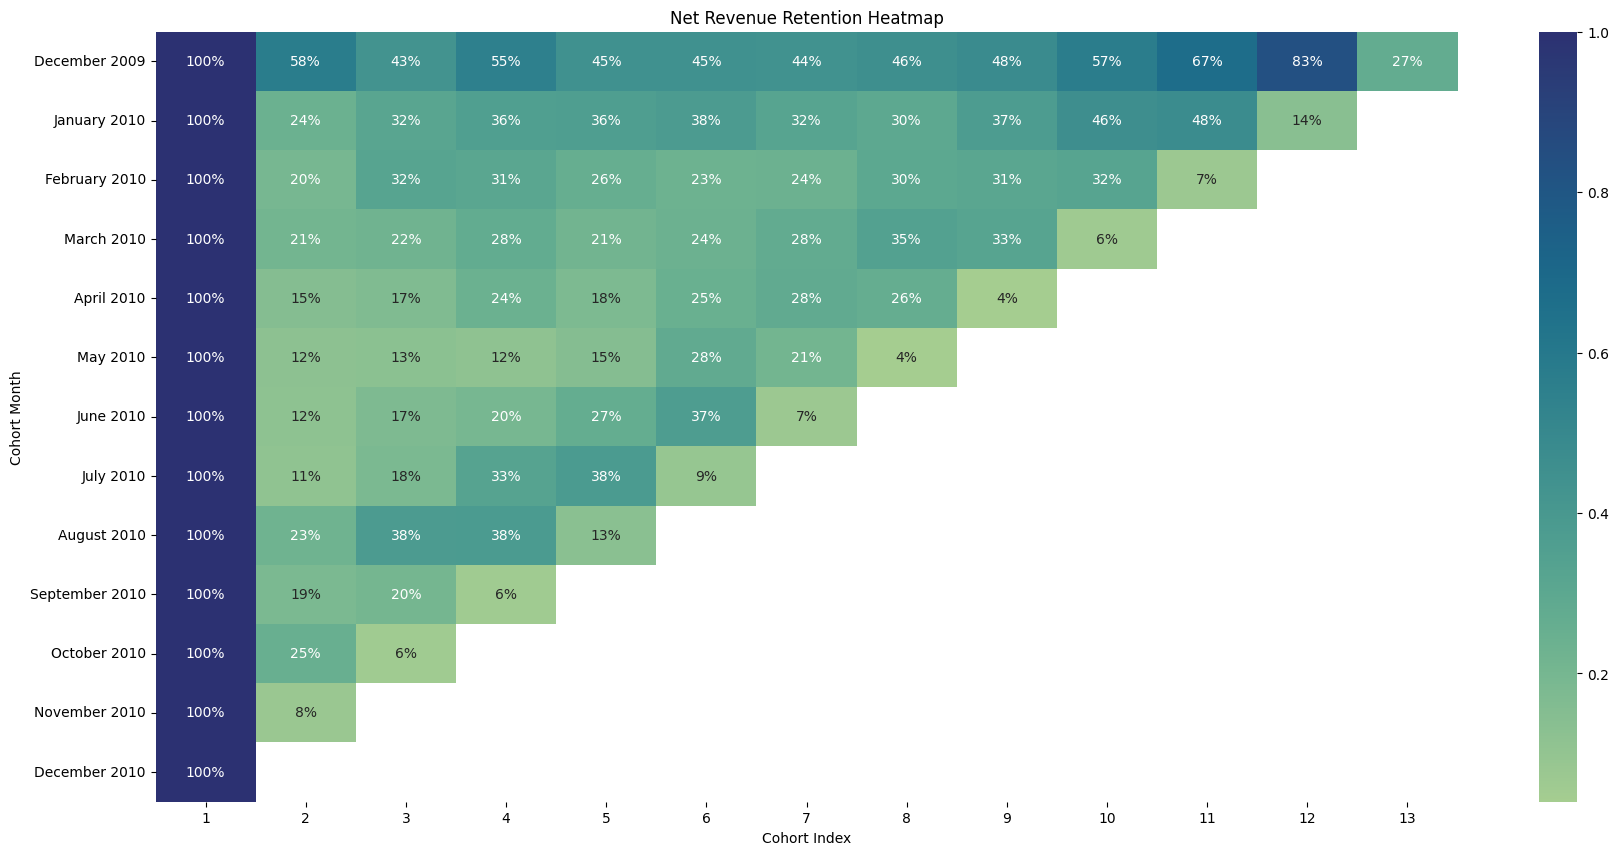

In [105]:
plt.figure(figsize= (21, 10))
sns.heatmap(percent_cohort_revnue, annot= True, cmap= 'crest', fmt='.0%')
#plt.yticks(rotation=90)
plt.title('Net Revenue Retention Heatmap')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')

plt.show()

#Customer Lifetime Value

In [131]:
def get_CLV_table(df):
  max_date = df['Date'].max()
  df = df.groupby(['Customer ID']).agg(
    {'Date' : lambda x: (max_date - x.min()).days,
     #'Date' : lambda x: (max_date - x.max()).days,
     'Invoice': lambda x: len(x),
     'Quantity': lambda x: x.sum(),
     'Revenue': lambda x: x.sum()
    }
   )
  return df
#CLV_df.rename(columns={'Revenue': 'Total_Revenue'}, inplace=True)


In [132]:
CLV_df = get_CLV_table(cohort_df)
CLV_df.rename(columns={'Invoice': 'Frequency', 'Revenue': 'Total_Revenue'}, inplace=True)
CLV_df.head()

,Date,Frequency,Quantity,Total_Revenue
Customer ID,,,,
12346.0,275,24,24,169.36
12347.0,61,71,828,1323.32
12348.0,91,20,373,222.16
12349.0,244,102,993,2671.14
12351.0,30,21,261,300.93


In [137]:
CLV_df['AOV'] = CLV_df['Total_Revenue']/CLV_df['Frequency']
CLV_df = CLV_df.drop('CLTV', axis = 1)
CLV_df

,Date,Frequency,Quantity,Total_Revenue,AOV
Customer ID,,,,,
12346.0,275,24,24,169.36,7.056667
12347.0,61,71,828,1323.32,18.638310
12348.0,91,20,373,222.16,11.108000
12349.0,244,102,993,2671.14,26.187647
12351.0,30,21,261,300.93,14.330000
...,...,...,...,...,...
18283.0,303,230,336,641.77,2.790304
18284.0,61,28,494,461.68,16.488571
18285.0,303,12,145,427.00,35.583333


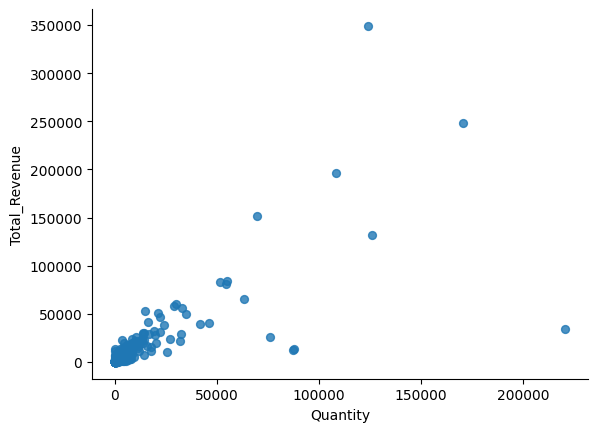

In [161]:
# @title Quantity vs Total_Revenue

from matplotlib import pyplot as plt
CLV_df.plot(kind='scatter', x='Quantity', y='Total_Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [138]:
def calculate_churn_rate(df, start_date, end_date):
    # Convert 'Date' to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter data for the period
    period_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    # Number of customers at the start of the period
    start_customers = df[df['Date'] == start_date]['Customer ID'].nunique()

    # Number of customers who left during the period
    end_customers = df[df['Date'] == end_date]['Customer ID'].nunique()

    churned_customers = start_customers - end_customers

    churn_rate = (churned_customers / start_customers) * 100

    return churn_rate

In [141]:
churn_rate = calculate_churn_rate(cohort_df, cohort_df['Date'].min(), cohort_df['Date'].max())
print(f'Churn Rate: {churn_rate:.2f}%')

Churn Rate: 39.94%


<ipython-input-138-9c09b26ccce8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [149]:
purchase_freq = CLV_df['Frequency'].mean()
purchase_freq

94.53942486085343

In [160]:
CLV_df['CLV'] = ((CLV_df['AOV'] * purchase_freq )/ churn_rate)
CLV_df.head()

,Date,Frequency,Quantity,Total_Revenue,AOV,CLV
Customer ID,,,,,,
12346.0,275,24,24,169.36,7.056667,16.704595
12347.0,61,71,828,1323.32,18.638310,44.120750
12348.0,91,20,373,222.16,11.108000,26.294943
12349.0,244,102,993,2671.14,26.187647,61.991598
12351.0,30,21,261,300.93,14.330000,33.922086


In [158]:
CLV_df.tail()

,Date,Frequency,Quantity,Total_Revenue,AOV,CLV
Customer ID,,,,,,
18283.0,303,230,336,641.77,2.790304,1.321046
18284.0,61,28,494,461.68,16.488571,7.806374
18285.0,303,12,145,427.00,35.583333,16.846628
18286.0,365,67,608,1296.43,19.349701,9.160952
18287.0,214,85,1427,2345.71,27.596588,13.065371


In [159]:
print(f'The median CLV is: {CLV_df["CLV"].median()}')
print(f'The mean CLV is: {CLV_df["CLV"].mean()}')

The median CLV is: 8.215120996523162
The mean CLV is: 17.497608547030218


#RFM Analysis

In [ ]:
recency = sorted_df.groupby(['Customer ID']).agg({"YearMonth": lambda x: ((day - x.max()).days)})
recency

,YearMonth
Customer ID,
12346.0,1007
12347.0,824
12348.0,915
12349.0,885
12351.0,854
...,...
18284.0,885
18285.0,1127
18286.0,946


In [ ]:
temporal_feature = [feature for feature in df.columns if 'Date' in feature]
temporal_feature

['Date']

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O' and feature != 'Customer ID' and feature not in temporal_feature]
numerical_feature

['Quantity', 'Price']

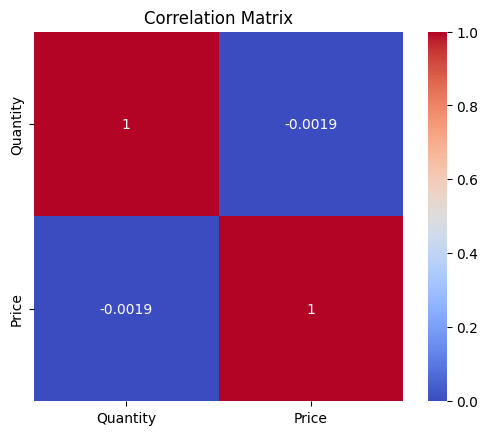

In [ ]:
correlation = df[numerical_feature].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
country_sales = df.groupby('Country')[['Quantity', 'Price']].sum().reset_index()

In [ ]:
country_sales

,Country,Quantity,Price
0,Australia,20053,4056.320
1,Austria,6479,2482.800
2,Bahrain,1015,352.920
3,Belgium,11980,7226.750
4,Bermuda,2798,84.700
5,Brazil,189,113.710
6,Canada,894,147.510
7,Channel Islands,10994,5318.250
8,Cyprus,4371,2413.880
9,Denmark,227030,1130.940


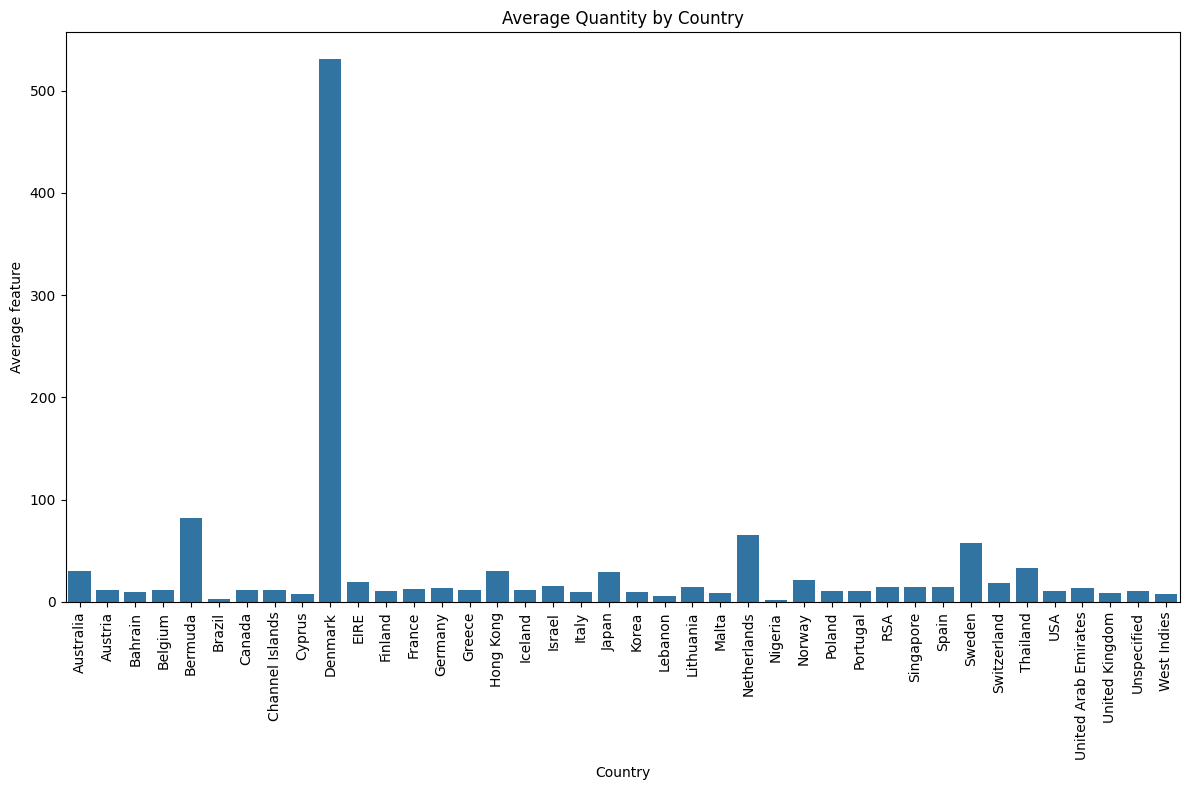

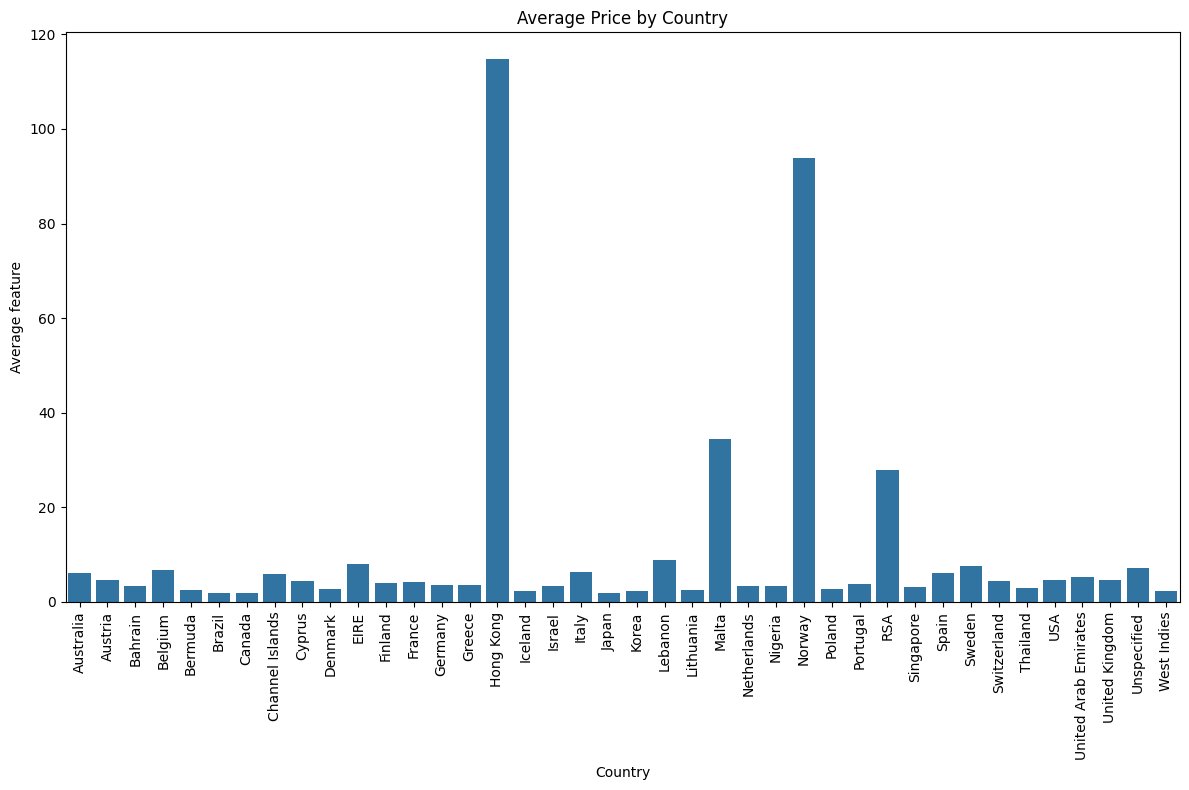

In [ ]:
for feature in df[numerical_feature]:
  avg_feature = df.groupby('Country')[feature].mean().reset_index()

  plt.figure(figsize=(12, 8))
  sns.barplot(data=avg_feature, x='Country', y= feature)
  plt.xlabel('Country')
  plt.ylabel('Average feature')
  plt.title(f'Average {feature} by Country')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

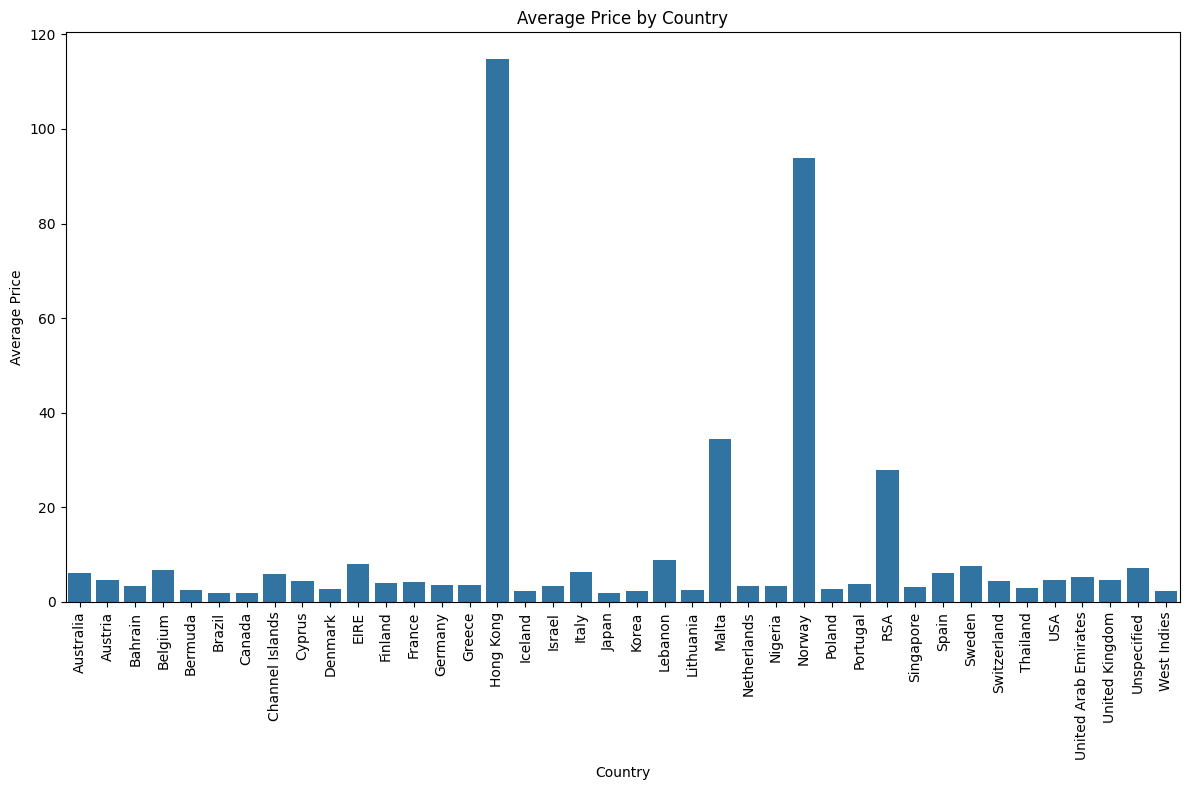

In [ ]:
#country_avg_price = df.groupby('Country')['Price'].mean().reset_index()

# Create a bar plot
#plt.figure(figsize=(12, 8))
#sns.barplot(data=country_avg_price, x='Country', y='Price')
#plt.xlabel('Country')
#plt.ylabel('Average Price')
#plt.title('Average Price by Country')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()

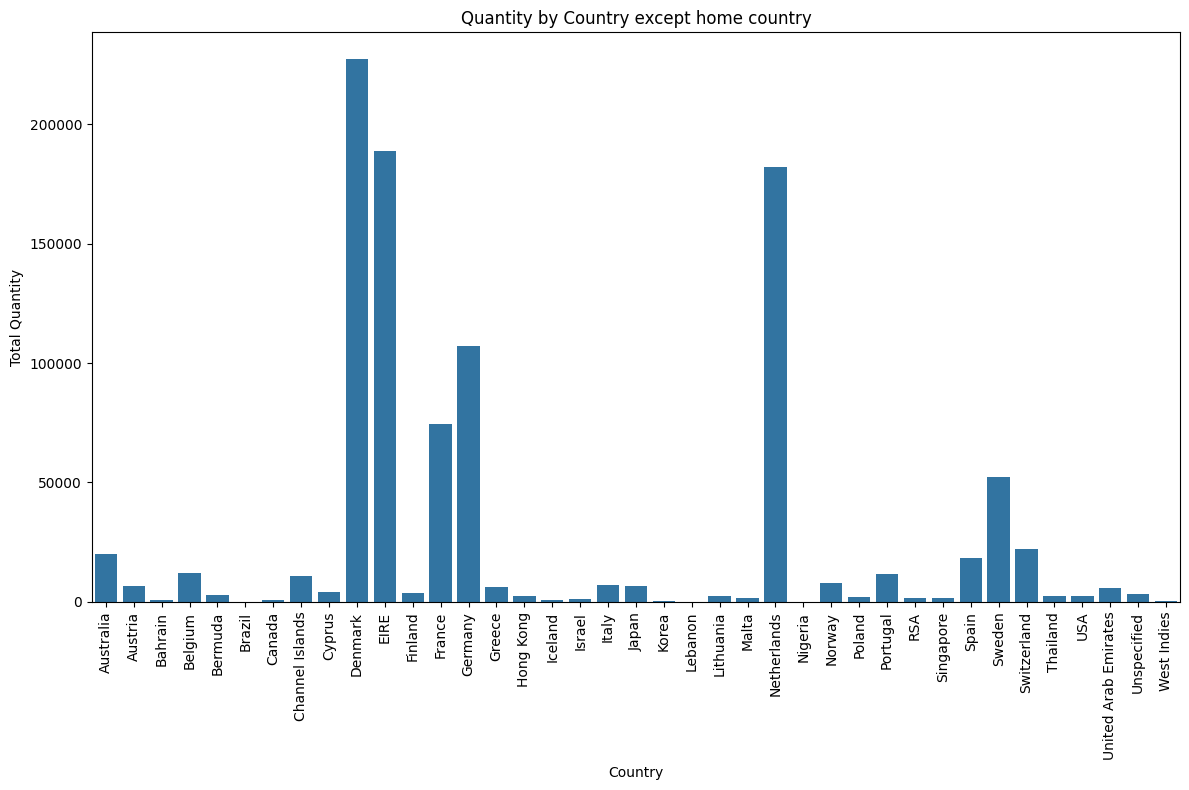

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=country_sales[country_sales['Country'] != 'United Kingdom'], x='Country', y='Quantity')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Quantity by Country except home country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['total_price'] = df.groupby('InvoiceDate')['Price'].transform('sum')

In [ ]:

total_price_per_date = negative_price.groupby('Date')['Price'].sum().reset_index()

# 3. Rename columns for clarity
total_price_per_date.rename(columns={'Price': 'total_price'}, inplace=True)

# 4. Format the 'Date' column to just include the date part
total_price_per_date['Date'] = total_price_per_date['Date'].dt.date

In [ ]:
total_price_per_date

,Date,total_price
0,2010-04-29,-53594.36
1,2010-07-19,-44031.79
2,2010-10-20,-38925.87


In [ ]:
df.nunique()

,0
Invoice,28816
StockCode,4632
Description,4681
Quantity,825
InvoiceDate,25296
Price,1606
Customer ID,4383
Country,40
total_price,11645


In [ ]:
data = df.groupby('Date', as_index=False)['Price'].sum()
data.rename(columns={'Price': 'TotalPrice'}, inplace=True)

In [ ]:
data.head()

,Date,TotalPrice
0,2009-12-01,14450.54
1,2009-12-02,13411.96
2,2009-12-03,13290.25
3,2009-12-04,9687.28
4,2009-12-05,1443.26


In [ ]:
print(df[df['Price'] < 0])


        Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

           Price Customer ID         Country  total_price        Date  
179403 -53594.36         NaN  United Kingdom    -53580.79  2010-04-29  
276274 -44031.79         NaN  United Kingdom    -44031.79  2010-07-19  
403472 -38925.87         NaN  United Kingdom    -38925.87  2010-10-20  


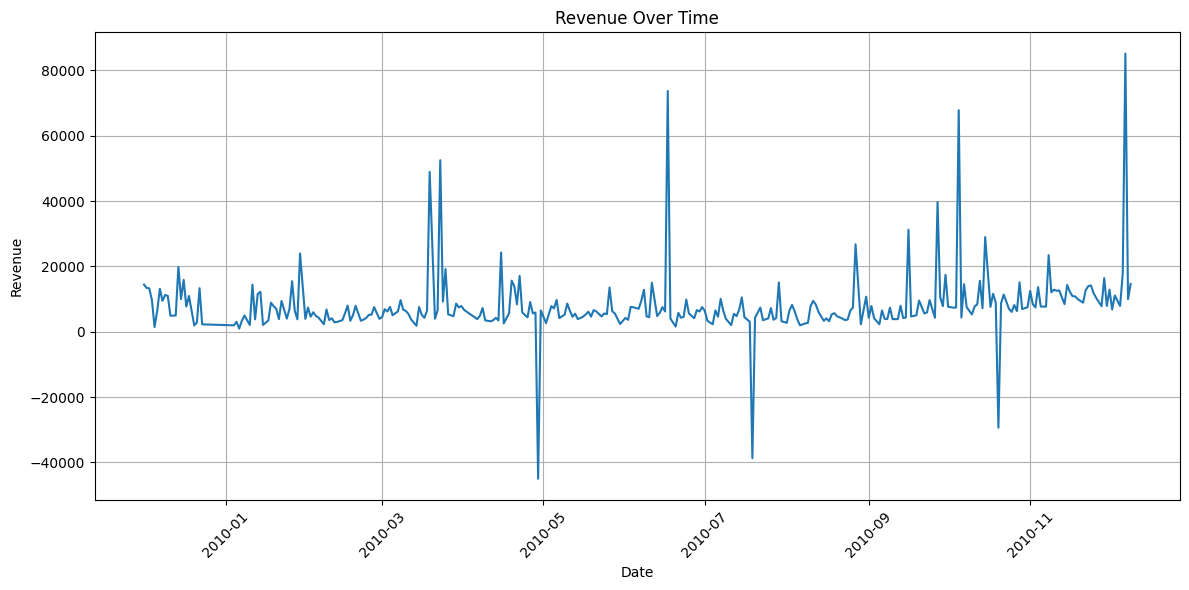

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['TotalPrice'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_quant = df.groupby('Date', as_index=False)['Quantity'].sum()
data_quant.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)

In [ ]:
data_quant.head()

,Date,TotalQuantity
0,2009-12-01,24022
1,2009-12-02,29942
2,2009-12-03,44896
3,2009-12-04,21001
4,2009-12-05,5033


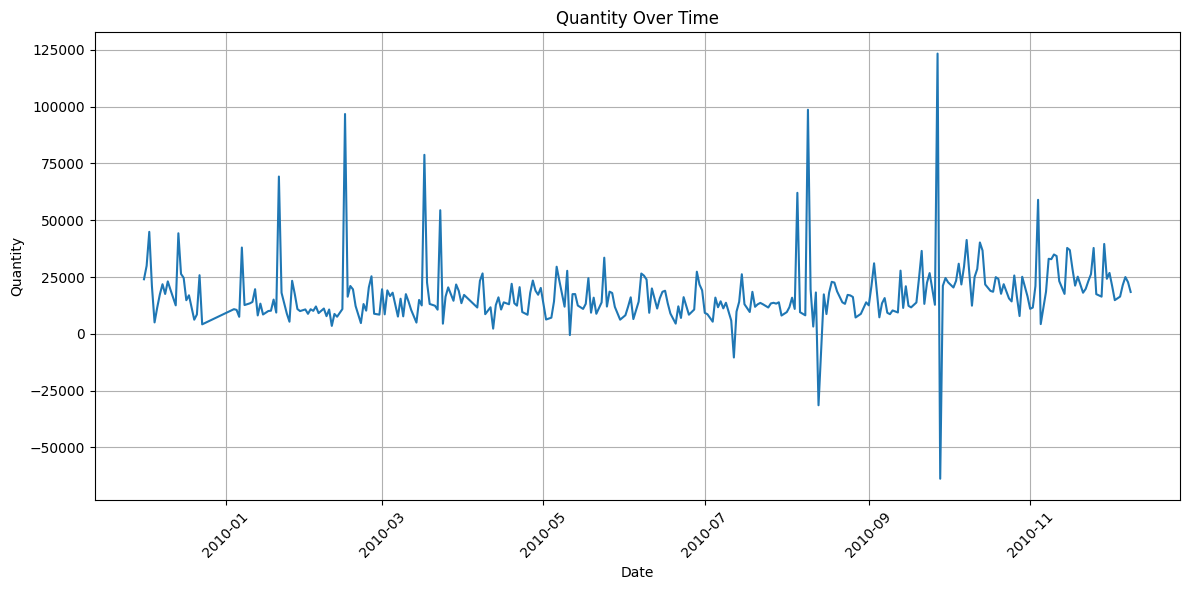

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_quant['Date'], data_quant['TotalQuantity'])
plt.title('Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#KMeans

#DBSCAN

#MeanShift


#agglomerative
